<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Histograms, Binnings, and Density

In [19]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

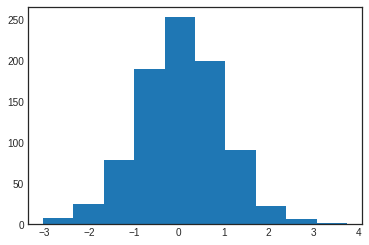

In [16]:
data = np.random.randn(874)
plt.hist(data);

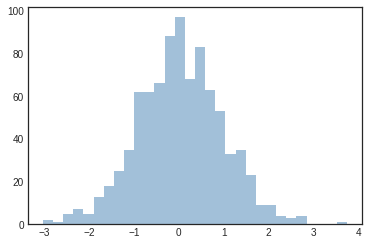

In [17]:
#customized histogram

plt.hist(data, bins=30, alpha=0.5,histtype='stepfilled', color='steelblue',edgecolor='none');

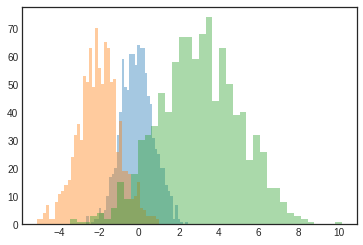

In [28]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.4, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);


In [29]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 33 268 452 113   8]
